import numpy as np imes
norm = lambda a : np.linalg.norm(a)
dot = lambda a,b : np.dot(a,b)
funky = lambda a,b : a[0]* b[0] - (a[0]*b[1] + a[1]*b[0]) + 2 * a[1]*b[1]
print(norm([3,4]))
print(dot([1,2],[3,4]))
    

In [4]:
#⟨x, y⟩ := x1y1 − (x1y2 + x2y1) + 2x2y2
print(1 * 3 - (1 * 4 + 2 * 3) + 2* 2)

-3


a set of basis vectors is a bilinear mapping

In [5]:
lamb = 2
phi = 3
b1 ,b2, b3 = np.array([[1,2,3],[0,1,0] , [0,0,1]])
b1, b2, b3 = np.array([[1,2],[2,3], [3,-2]])
print(funky(lamb * b1 + phi * b2, b3))
print(lamb * funky(b1,b3) + phi * funky(b2, b3))
# print(np.dot(b1,b2))
# print(np.dot(b1, 2 * np.asarray(b2)) == 2 * np.dot(b1, b2))

-51
-51


In [6]:
B = np.array([[1,1], [2,1]])
psi = np.array([2,3])
lamb = np.array([4,5])

xhat = psi.reshape(-1,1)
yhat = lamb.reshape(-1,1)
print('xhat', xhat)
print('yhat', yhat)
# print(np.dot(psi, lamb))
summation = 0 
for i in range(2):
    for j in range(2):
        summation+=xhat[i] * np.dot(B[i], B[j]) * yhat[j]
print('B shape', B.shape)
A = B.T @ B
print('A', A)
print('xhat', xhat)
print('shape of x and y', xhat.shape)
print(summation)

print(xhat.T @ A @ yhat)

xhat [[2]
 [3]]
yhat [[4]
 [5]]
B shape (2, 2)
A [[5 3]
 [3 2]]
xhat [[2]
 [3]]
shape of x and y (2, 1)
[157]
[[136]]


In [7]:
B = np.array([[1,0], [2,1]])
psi = np.array([2,3])
lamb = np.array([4,5])

x = B @ psi.reshape(-1,1)
y = B @ lamb.reshape(-1,1)

print(B.shape)
print(B)
print(x.T @ y)

summation = 0 
for i in range(2):
    for j in range(2):
        summation+=psi[i] * np.dot(B.T[i], B.T[j]) * lamb[j]
print(summation)

A = B.T @ B
print(A)
xhat = psi.reshape(-1,1)
yhat = lamb.reshape(-1,1)
print(xhat.T @ A @ yhat)

(2, 2)
[[1 0]
 [2 1]]
[[99]]
99
[[5 2]
 [2 1]]
[[99]]


Dot product: ${x_{1}y_{1} + x_{2}y_{2}}$

Euclidean Metric: $\sqrt{(x_{1}-y_{1})^{2} + (x_{2}-y_{2})^2}$

In [8]:
# cauchy shwarz? show its relevance
#example 3.5 what are the ramifications of using a different inner product. When is it even an inner product again?
# norm definition
a = [1, -1, 1]
b = [-10, -1, 1]

In [9]:
# compare euclidean distance and dot product 
np.dot(a, a)

np.linalg.norm

<function numpy.linalg.norm>

### Orthogonal Matrix
    If a matrix is orthogonal it is also orthonormal
    A and B here are both orthogonal matrix    

In [10]:
A = np.array([[1,0],[0,1]])
B = np.array([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]])
x = np.array([1,2])
print("Norm of x", np.linalg.norm(x)**2)
print(A @ x, '| | = ', np.linalg.norm(A@x) ** 2)
print(B.T @ x, '| | = ', np.linalg.norm(B @ x))

Norm of x 5.000000000000001
[1 2] | | =  5.000000000000001
[ 2.12132034 -0.70710678] | | =  2.2360679774997894


In [11]:
# A = []
# V = np.array([[2,0],[0,1]])
# u1 = V[:,0]/np.linalg.norm(V[:,0])
# A.append(u1)
# v2 = V[:,1]
# u2 = (v2 - v2 @ u1)/np.linalg.norm(v2)
# A.append(u2)

# print(u1)
# print(u2)
# print(A)
def gram_schmidt(V):
    '''
    Input: set of linearly independent vectors V (n,k)
    Output: set of orthonormal basic vectors A (n,k)
    '''
    V = np.asarray(V)
    A = []
    u1 = V[:,0]/np.linalg.norm(V[:,0])
    A.append(u1)
    for i in range(1, len(V)):
        vi = V[:,i].reshape(len(V[:,i]), 1)
        proj = 0
        for j in range(len(A)):
            u = np.asarray(A).T[:,j]
            u = u.reshape(len(u),1)
            proj += vi *u *u
        ui = (vi - proj)/np.linalg.norm(vi)
        A.append(ui.reshape(len(ui)))
    return np.asarray(A)

V = [[3,0,0],[0,4,0],[0,0,5]]
print(gram_schmidt(V))


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 3.6 - 4.0

### Old

Subspace
- Requirement i) v + w is closed
- Requirement ii) c*v is closed
- 0 exists
- Examples like line, plane, single vector, whole space
- Forgot: how many dimensions in a guy again? Same as vector space right? Don't confuse dimensions and number of basis. Has to be strictly less than.



Affine space*
- Off the origin

What are the types of morphisms?
- homomorphism mapping of algebraic structure, linear map. Same as functor in category theory
- iso V -> W linear bijective, invertible. benefit just renaming graph replace with what you know
- endo V > Vlinear, morphism to self. Endo that is isomorphism is automorphism
- automorphism V -> V linear and bijective, isomorphism to self but better than endo because bijective

### New

Orthogonal Complement
- You can describe a plane with a vector 'normal'. generalizes to hyperplane
- x can be uniquely decomposed

Inner product of functions
- show this is true with sin(x) cos(x), function has limit 

Orthogonal projection
- affine
- idempotent

Rotations
- preserves distances, lengths, angles
- not commutative 3D and onward

Gram-Schmidt

linear transformation vs projection 

represent linear transformation with matrix

givens

better viiusalizaion

### Show/prove/experiments

Rotation

projections

Representing a space with hyperplane

What doeds it mean for functions to be orthogonal? Inner function of product 

f o g = f(g(x))



$x = \sum \lambda_{m}b_{m}$

## Determinant

In [14]:
A = np.array([[1,2,3],[3,1,2],[0,0,1]])
A_1= np.array([A[0],A[1] + 2* A[2], A[2]])
A_order = np.array([A[2],A[1],A[0]])
A_lamb = np.array([A[0],A[1],5 * A[2]])
print('regular',np.linalg.det(A))
print('scaled row addtion to another row',np.linalg.det(A_1))
print('order of row change', np.linalg.det(A_order))
print('Scaled one row of A only ', np.linalg.det(A_lamb))

regular -5.000000000000001
scaled row addtion to another row -5.000000000000001
order of row change 5.000000000000001
Scaled one row of A only  -25.000000000000007


## Eigenvectors and Eigenvalues


### Really cool paper in Nature about how the brain uses eigenvectors for facial recognition: https://www.sciencedirect.com/science/article/pii/S009286741730538X
- the experiment done is well-thought out. They use real eigenvectors, and map neural cells onto that plane. By then changing faces you can guess which neurons will fire based on how they have been mapped onto your eigenspace.

Trace is useful because the trace is equal to the sum of the eigenvectors. Therefore you can guess some of the remaining eigenvalues when you have a few

In [21]:
A = 5 * np.random.rand(3,3)
A

array([[0.46493158, 1.60843313, 0.41244938],
       [1.78533581, 4.6965384 , 3.05217879],
       [1.00803679, 3.65117396, 3.346039  ]])

In [22]:
# make it positive semidefinite
A += 10 * np.eye(3,3)

Case where we take the eigenvectors of $A$

$$Ax=\lambda x$$

In [25]:
values, vectors = np.linalg.eig(A)
print('------')
print(values)
print(vectors)

print('------')
print(vectors[:,0:1])
print('A @ firsteigenvec\n', A @ vectors[:,0:1])
print('firsteigenvec @ firsteigenvalue\n', vectors[:,0:1] * values[0])
print('norm of eigenvec ', np.linalg.norm(vectors[:,0:1]))

------
[17.83736447  9.75044891 10.9196956 ]
[[-0.19720129 -0.87480783 -0.55242991]
 [-0.73857929  0.44038007 -0.35016645]
 [-0.64467998 -0.20193229  0.7564421 ]]
------
[[-0.19720129]
 [-0.73857929]
 [-0.64467998]]
A @ firsteigenvec
 [[ -3.51755126]
 [-13.17430802]
 [-11.49939184]]
firsteigenvec @ firsteigenvalue
 [[ -3.51755126]
 [-13.17430802]
 [-11.49939184]]
norm of eigenvec  1.0


Case where we take the eigenvectors of $A^TA$
Would like to point out that due to the innacuracy of the eigenvector algorihtm the values wll not be exactly equal

In [18]:
values, vectors = np.linalg.eig(A @ A.T)
print('-----')
print(values)
print(vectors )
print('-----')
print(vectors[:,0:1])
print('A @ somevec\n', A @ A.T @ vectors[:,0:1])
print('somevec @ values\n', vectors[:,0:1] * values[0])
print('norm of eigenvec ', np.linalg.norm(vectors[:,0:1]))
print('we can also see that the eigenvectors are symmetric on both axes')
print('norm of eigenvec on other axes', np.linalg.norm(vectors[0]))

-----
[219.87224185  83.77065612 100.49858882]
[[-0.50624692 -0.75553932 -0.41578166]
 [-0.55531909  0.65446664 -0.51312195]
 [-0.65979903  0.02887491  0.75088713]]
-----
[[-0.50624692]
 [-0.55531909]
 [-0.65979903]]
A @ somevec
 [[-111.30964605]
 [-122.09925301]
 [-145.07149219]]
somevec @ values
 [[-111.30964605]
 [-122.09925301]
 [-145.07149219]]
norm of eigenvec  1.0
we can also see that the eigenvectors are symmetric on both axes
norm of eigenvec on other axes 0.9999999999999997


## Are eigenvectors orthogonal?

In [27]:
values, vectors = np.linalg.eig(A)
print('-----')
print(values)
print(vectors )
print('-----')
print('A dot product of two eigenvectors: ', vectors[:,2:3].T@ vectors[:,1:2])


values, vectors = np.linalg.eig(A.T@A)
print('-----')
print(values)
print(vectors )
print('-----')
print('A.T @ A dot product of two eigenvectors:', np.dot(vectors[:,2:3].T, vectors[:,1:2]))


-----
[17.83736447  9.75044891 10.9196956 ]
[[-0.19720129 -0.87480783 -0.55242991]
 [-0.73857929  0.44038007 -0.35016645]
 [-0.64467998 -0.20193229  0.7564421 ]]
-----
A dot product of two eigenvectors:  [[0.1763136]]
-----
[319.29037039  94.89738798 119.0396331 ]
[[-0.24167978 -0.83958022 -0.48651408]
 [-0.76841337  0.47176435 -0.43241101]
 [-0.59256373 -0.26933893  0.75916057]]
-----
A.T @ A dot product of two eigenvectors: [[1.11022302e-16]]


### it seems like they aren't for nonsymmetric matrices

## Explanation of why we take the covariance matrix when finding the axes which explains the most variance:
 When you multiple A by itself, you end up with all these "variances". You want to find the eigenvectors in the direction where the most variance was explained
 Now you could just pick one of these axes, lets say you pick a random axes that points in the direction of one of the vectors that had high variance. You would get a good component, but it won't be the best possible axes. the stronges principle component (THE TOP DOG), is in the direction where if you dot a bunch of vectors with it and add up their covariances, you would get the HIGEST number, every succeeding principle component is just the same process with the previous component axes removed.

Defined as $\frac{|A|}{|A^{-1}|}$

In [52]:
A = np.array([[1,0,0],
             [0,3,0],
             [0,0,1]])
A.T @ A

array([[1, 0, 0],
       [0, 9, 0],
       [0, 0, 1]])

In [53]:
A.T

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 1]])

## Matrix rotations

#### Youtube explanation for 2D
https://www.youtube.com/watch?v=Ta8cKqltPfU
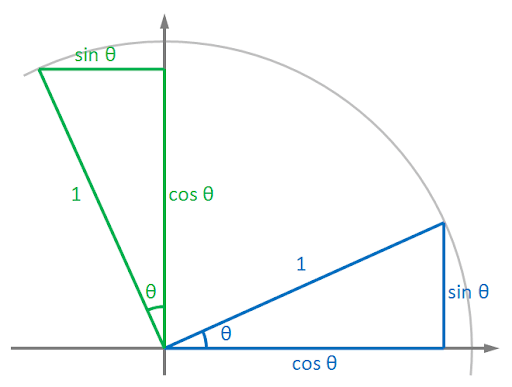

#### Youtube explanation for 3D
https://www.youtube.com/watch?v=wg9bI8-Qx2Q
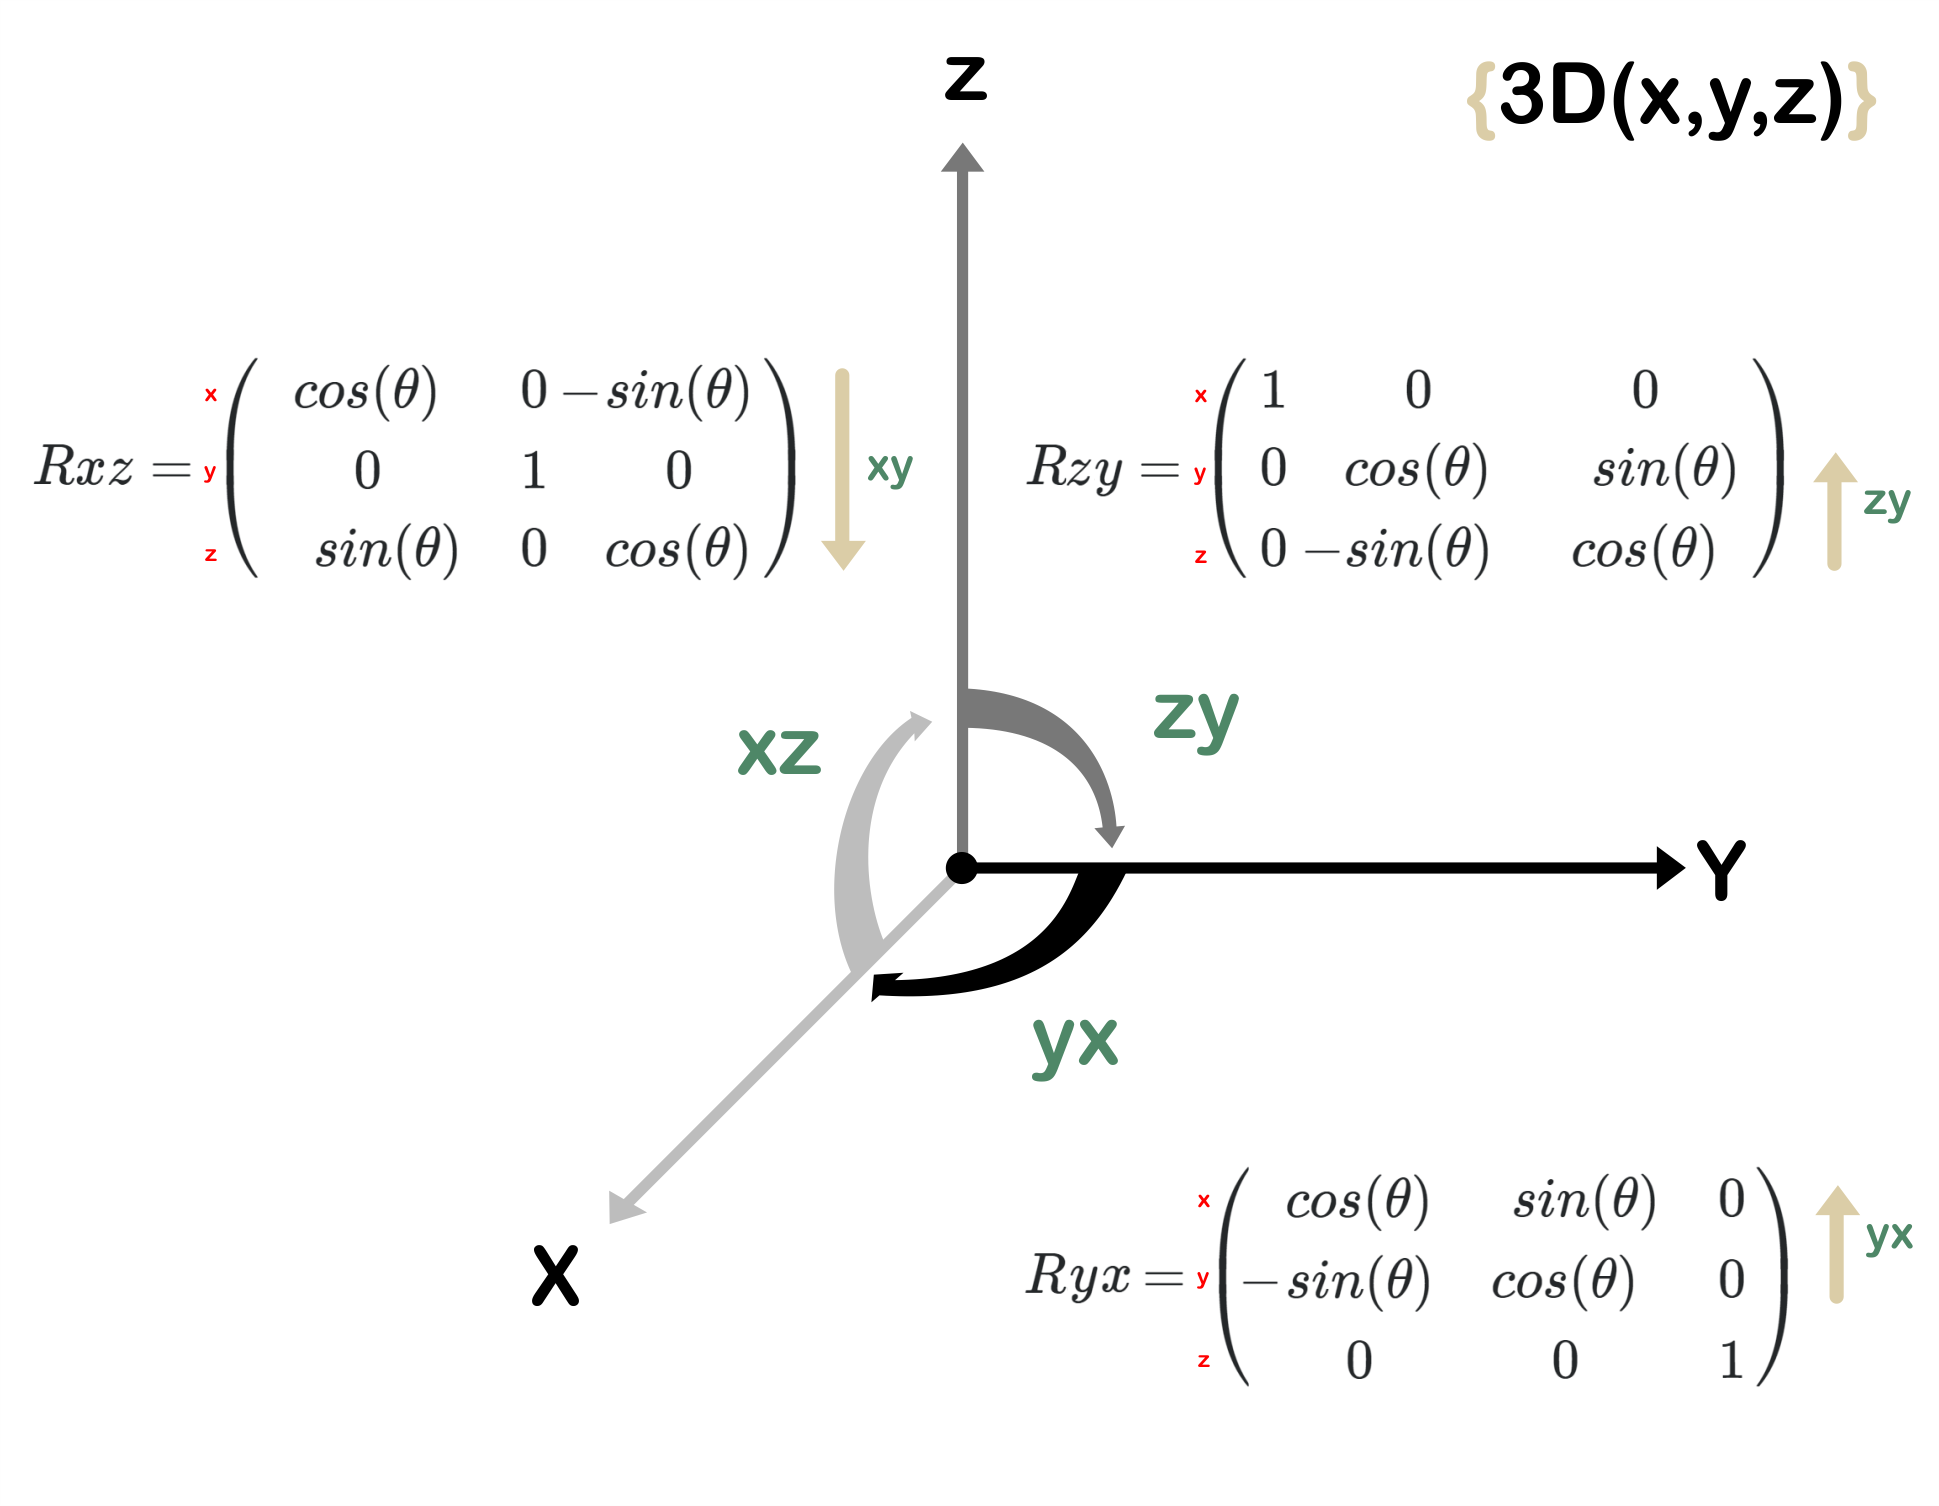

## SVD on gun, player combinations

In [6]:
import numpy as np
players = ['Jad', 'Alan', 'Kevin']
Guns = ['M4A1', 'MP5', 'HDR', 'FN FAL']
A = [[350 ,750 ,0],
     [750 ,1000,0],
     [1000,3000,0],
     [1500,800 ,0]]
# n x m: n rows, m columns
# np.shape
print(np.asarray(A).shape)

u,s,vt = np.linalg.svd(A)
print('norm', np.linalg.norm(u[:,0]))
print(u[:,0])
print(vt[0])
print(s[0])


(4, 3)
norm 1.0
[0.22159188 0.33058787 0.83676935 0.37606617]
[0.46266785 0.8865317  0.        ]
3731.330468105143




## TODO: do this for A.T A (PCA)

[[ 1.000000e+00 -9.750000e+01  0.000000e+00]
 [-9.750000e+01  3.501875e+04  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00]]
norm 1.0
[0. 0. 1.]
[0.99999612 0.00278427 0.        ]
0.0
eigenvalues [3.50190215e+04 7.28532635e-01 0.00000000e+00]
[[-6.37483608e+01 -6.77495266e-01]
 [-3.87512419e+01  3.92107604e-01]
 [ 1.61250767e+02 -5.10345454e-02]
 [-5.87511644e+01  3.36422207e-01]]


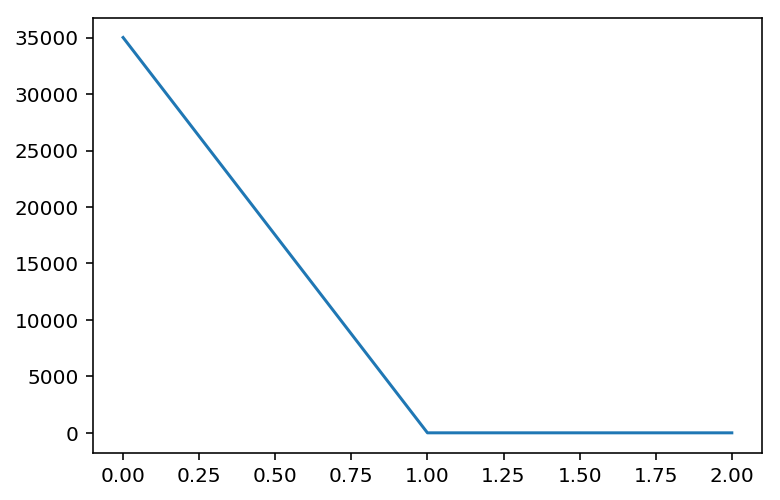

In [5]:
import numpy as np
import matplotlib.pyplot as plt
players = ['Jad', 'Alan', 'Kevin']
Guns = ['M4A1', 'MP5', 'HDR', 'FN FAL']
A = [[0,2,700],
     [0 ,100,1000],
     [0,300,700],
     [0,80 ,700]]
# n x m: n rows, m columns
# np.shape
A = np.asarray(A) - np.mean(A,axis=0)
print((A.T @ A))

u,s,vt = np.linalg.svd(A.T @ A)
print('norm', np.linalg.norm(u[:,0]))
print(u[:,2])
print(vt[1])
print(s[2])
print('eigenvalues', s)
newdata = A @ u[:,0:2].reshape(-1,2)
print(newdata)

plt.plot(s)


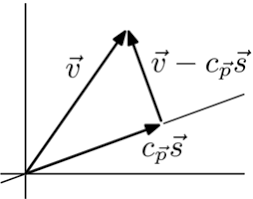

[PCA](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.09-PCA-rotation.png)
<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.09-PCA-rotation.png">

[ok](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_7/PCAAnimation.gif)
<img src= "https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_7/PCAAnimation.gif">